## Phase 1

In [16]:
# Install libraries 
!pip install pandas numpy matplotlib seaborn scikit-learn tensorflow torch arch

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Defaulting to user installation because normal site-packages is not writeable


In [17]:
# Load dataset (change file name if different)
df = pd.read_csv("all_stocks_5yr.csv")

# Check first few rows
df.head()


,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [18]:
# General info about dataset
df.info()

# Summary statistics
df.describe()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619040 non-null  object 
 1   open    619029 non-null  float64
 2   high    619032 non-null  float64
 3   low     619032 non-null  float64
 4   close   619040 non-null  float64
 5   volume  619040 non-null  int64  
 6   Name    619040 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 33.1+ MB


,open,high,low,close,volume
count,619029.000000,619032.000000,619032.000000,619040.000000,6.190400e+05
mean,83.023334,83.778311,82.256096,83.043763,4.321823e+06
std,97.378769,98.207519,96.507421,97.389748,8.693610e+06
min,1.620000,1.690000,1.500000,1.590000,0.000000e+00
25%,40.220000,40.620000,39.830000,40.245000,1.070320e+06
50%,62.590000,63.150000,62.020000,62.620000,2.082094e+06
75%,94.370000,95.180000,93.540000,94.410000,4.284509e+06
max,2044.000000,2067.990000,2035.110000,2049.000000,6.182376e+08


In [19]:
# Check missing values
print(df.isnull().sum())

# Check duplicated rows
print("Duplicated rows: ", df.duplicated().sum())


date       0
open      11
high       8
low        8
close      0
volume     0
Name       0
dtype: int64
Duplicated rows:  0


In [20]:
# Convert date column to datetime
df["date"] = pd.to_datetime(df["date"])

# Check number of unique stocks
print("Number of stocks:", df["Name"].nunique())
print("Sample tickers:", df["Name"].unique()[:10])

# Date range
print("Date Range:", df["date"].min().date(), "to", df["date"].max().date())


Number of stocks: 505
Sample tickers: ['AAL' 'AAPL' 'AAP' 'ABBV' 'ABC' 'ABT' 'ACN' 'ADBE' 'ADI' 'ADM']
Date Range: 2013-02-08 to 2018-02-07


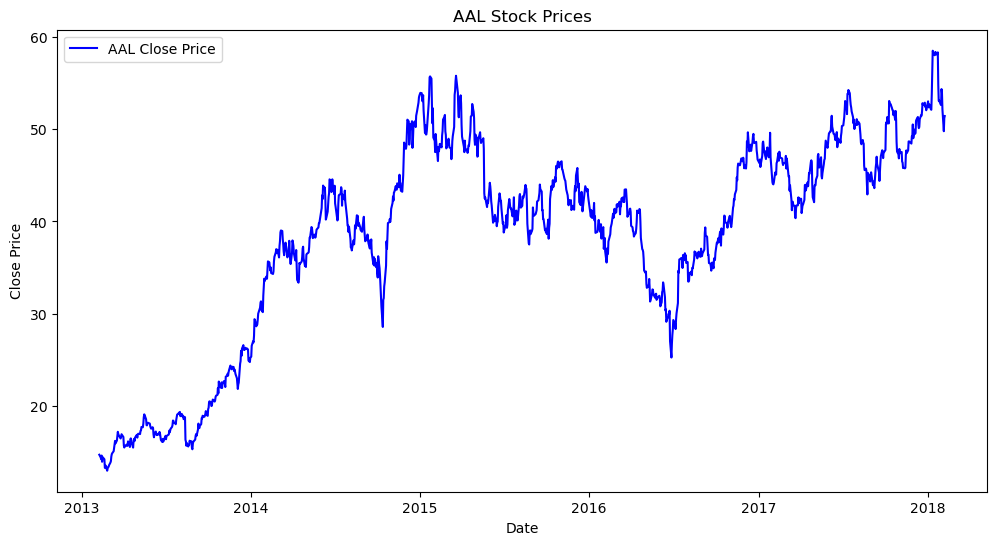

In [21]:
# Function to plot stock price for any ticker
def plot_stock(ticker):
    stock_df = df[df["Name"] == ticker]

    if stock_df.empty:
        print(f"No data found for ticker: {ticker}")
        return

    plt.figure(figsize=(12,6))
    plt.plot(stock_df["date"], stock_df["close"], label=f"{ticker} Close Price", color="blue")
    plt.title(f"{ticker} Stock Prices")
    plt.xlabel("Date")
    plt.ylabel("Close Price")
    plt.legend()
    plt.show()

# Example: plot AAL stock prices
plot_stock("AAL")


## Phase 2

In [24]:


# Sort values for safety
df = df.sort_values(['Name','date']).reset_index(drop=True)

# Display a quick sample
df.head()


,date,open,high,low,close,volume,Name
0,2013-02-08,45.07,45.35,45.00,45.08,1824755,A
1,2013-02-11,45.17,45.18,44.45,44.60,2915405,A
2,2013-02-12,44.81,44.95,44.50,44.62,2373731,A
3,2013-02-13,44.81,45.24,44.68,44.75,2052338,A
4,2013-02-14,44.72,44.78,44.36,44.58,3826245,A


In [29]:
# Cell B: Stock selection overview
def stock_overview(df):
    overview = []
    for ticker, g in df.groupby('Name'):
        start = g['date'].min().date()
        end = g['date'].max().date()
        n = len(g)
        mean_price = g['close'].mean()
        volatility = g['close'].pct_change().std()  # basic daily vol
        avg_vol = g['volume'].mean()
        overview.append((ticker, start, end, n, mean_price, volatility, avg_vol))
    cols = ['Name','start_date','end_date','n_obs','mean_close','daily_ret_std','avg_volume']
    return pd.DataFrame(overview, columns=cols).sort_values('daily_ret_std', ascending=False)

overview_df = stock_overview(df)
overview_df.head(30)  # shows the most volatile tickers at top


,Name,start_date,end_date,n_obs,mean_close,daily_ret_std,avg_volume
95,CHK,2013-02-08,2018-02-07,1259,13.681326,0.041658,2.495771e+07
32,AMD,2013-02-08,2018-02-07,1259,5.601863,0.037784,3.251904e+07
68,BHGE,2017-07-03,2018-02-07,152,33.890526,0.035219,4.133638e+06
182,FCX,2013-02-08,2018-02-07,1259,20.766370,0.034123,2.354922e+07
288,LNT,2013-02-08,2018-02-07,1259,32.786640,0.033373,1.230026e+06
475,VRTX,2013-02-08,2018-02-07,1259,101.611135,0.032103,1.859520e+06
245,INCY,2013-02-08,2018-02-07,1259,80.258009,0.029777,1.585685e+06
320,MRO,2013-02-08,2018-02-07,1259,23.824635,0.029739,1.167437e+07
486,WMB,2013-02-08,2018-02-07,1259,36.587585,0.029559,8.013221e+06
453,UA,2016-04-07,2018-02-07,464,23.723082,0.028596,3.362930e+06


In [49]:
# Cell C: Price processing functions
def prepare_price_df(df):
    dfp = df.copy()
    # Ensure numeric types
    for col in ['open','high','low','close','volume']:
        dfp[col] = pd.to_numeric(dfp[col], errors='coerce')
    # Sort by Name + date
    dfp = dfp.sort_values(['Name','date']).reset_index(drop=True)
    # Log close
    dfp['log_close'] = np.log(dfp['close'])
    # Daily log returns
    dfp['ret_1d'] = dfp.groupby('Name')['log_close'].diff()
    # Percent change
    dfp['pct_change'] = dfp.groupby('Name')['close'].pct_change()
    # High-low spread (absolute and %)
    dfp['hl_spread'] = dfp['high'] - dfp['low']
    dfp['hl_spread_pct'] = dfp['hl_spread'] / dfp['close']
    # Close-open move
    dfp['co_move'] = (dfp['close'] - dfp['open']) / dfp['open']
    return dfp

# ---- Data prep workflow ----
df = df.copy()
price_cols = ['open','high','low','close','volume']

# Fill missing prices per stock
df[price_cols] = df.groupby('Name')[price_cols].transform(lambda x: x.ffill().bfill())

# Calculate features
df = prepare_price_df(df)

# Check result
print(df.head())
print(df.info())
print(df.isnull().sum())


        date   open   high    low  close   volume Name  log_close    ret_1d  \
0 2013-02-08  45.07  45.35  45.00  45.08  1824755    A   3.808439       NaN   
1 2013-02-11  45.17  45.18  44.45  44.60  2915405    A   3.797734 -0.010705   
2 2013-02-12  44.81  44.95  44.50  44.62  2373731    A   3.798182  0.000448   
3 2013-02-13  44.81  45.24  44.68  44.75  2052338    A   3.801091  0.002909   
4 2013-02-14  44.72  44.78  44.36  44.58  3826245    A   3.797285 -0.003806   

   pct_change  hl_spread  hl_spread_pct   co_move  
0         NaN       0.35       0.007764  0.000222  
1   -0.010648       0.73       0.016368 -0.012619  
2    0.000448       0.45       0.010085 -0.004240  
3    0.002913       0.56       0.012514 -0.001339  
4   -0.003799       0.42       0.009421 -0.003131  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----        

In [57]:
df = df.groupby('Name').apply(lambda x: x.iloc[1:]).reset_index(drop=True)


C:\Users\LAPTOPS HUB\AppData\Local\Temp\ipykernel_8340\2993239538.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('Name').apply(lambda x: x.iloc[1:]).reset_index(drop=True)


In [59]:
df.isnull().sum()

date             0
open             0
high             0
low              0
close            0
volume           0
Name             0
log_close        0
ret_1d           0
pct_change       0
hl_spread        0
hl_spread_pct    0
co_move          0
dtype: int64

In [62]:
# Cell D: volatility measures per ticker
def add_volatility_measures(df, window=21, annualize=False):
    """
    window: rolling window in days (e.g., 21 for ~1 month)
    annualize: if True, multiply by sqrt(252/window) for an annualized measure (approx)
    """
    out = df.copy()
    # simple rolling std of returns
    out['vol_roll_std'] = out.groupby('Name')['ret_1d'].rolling(window).std().reset_index(level=0, drop=True)
    # realized volatility (sqrt of sum squared returns over window)
    out['realized_var'] = out.groupby('Name')['ret_1d'].rolling(window).apply(lambda x: np.sum(x**2), raw=True).reset_index(level=0, drop=True)
    out['realized_vol'] = np.sqrt(out['realized_var'])
    # Parkinson: (1 / (4 * ln 2)) * (ln(H/L))^2
    const_par = 1.0 / (4.0 * np.log(2.0))
    ln_hl = np.log(out['high'] / out['low'])
    out['parkinson_var'] = const_par * (ln_hl ** 2)
    out['parkinson_vol'] = np.sqrt(out['parkinson_var'])
    # Garman-Klass: 0.5*(ln(H/L))^2 - (2*ln2 -1)*(ln(C/O))^2
    ln_co = np.log(out['close'] / out['open'])
    const_gk = (2.0 * np.log(2.0) - 1.0)
    out['garman_klass_var'] = 0.5 * (ln_hl ** 2) - const_gk * (ln_co ** 2)
    # Rogers-Satchell: ln(H/O)*ln(H/C) + ln(L/O)*ln(L/C)
    ln_ho = np.log(out['high'] / out['open'])
    ln_hc = np.log(out['high'] / out['close'])
    ln_lo = np.log(out['low'] / out['open'])
    ln_lc = np.log(out['low'] / out['close'])
    out['rogers_satchell_var'] = (ln_ho * ln_hc) + (ln_lo * ln_lc)
    # Optionally compute rolling averages of these estimators
    out['parkinson_vol_roll'] = out.groupby('Name')['parkinson_vol'].rolling(window).mean().reset_index(level=0, drop=True)
    out['gk_vol_roll'] = np.sqrt(out.groupby('Name')['garman_klass_var'].rolling(window).mean().reset_index(level=0, drop=True).clip(lower=0))
    out['rs_vol_roll'] = np.sqrt(out.groupby('Name')['rogers_satchell_var'].rolling(window).mean().reset_index(level=0, drop=True).clip(lower=0))
    # Annualize if requested (approx)
    if annualize:
        factor = np.sqrt(252.0 / window)
        out['vol_roll_std_ann'] = out['vol_roll_std'] * factor
        out['realized_vol_ann'] = out['realized_vol'] * factor
        out['parkinson_vol_roll_ann'] = out['parkinson_vol_roll'] * factor
    return out

df = add_volatility_measures(df, window=21, annualize=True)  # example window 21
df[['date','Name','ret_1d','vol_roll_std','realized_vol','parkinson_vol','garman_klass_var','rogers_satchell_var']].head(25)


,date,Name,ret_1d,vol_roll_std,realized_vol,parkinson_vol,garman_klass_var,rogers_satchell_var
0,2013-02-11,A,-0.010705,NaN,NaN,0.009783,0.000070,0.000057
1,2013-02-12,A,0.000448,NaN,NaN,0.006043,0.000044,0.000042
2,2013-02-13,A,0.002909,NaN,NaN,0.007480,0.000077,0.000109
3,2013-02-14,A,-0.003806,NaN,NaN,0.005659,0.000041,0.000046
4,2013-02-15,A,-0.053681,NaN,NaN,0.028210,0.000785,0.000826
5,2013-02-19,A,0.017828,NaN,NaN,0.012810,0.000091,0.000054
6,2013-02-20,A,-0.018065,NaN,NaN,0.008824,0.000031,0.000008
7,2013-02-21,A,-0.014547,NaN,NaN,0.009625,0.000071,0.000062
8,2013-02-22,A,0.004075,NaN,NaN,0.007036,0.000068,0.000068
9,2013-02-25,A,-0.012276,NaN,NaN,0.013377,0.000106,0.000069


In [ ]:
# Cell E: lagged returns, moving averages, RSI, Bollinger Bands, volume features, calendar effects

def add_ml_features(df, lags=[1,5,20], ma_windows=[5,21,50], rsi_window=14, bb_window=20, bb_k=2):
    out = df.copy()
    # Lagged returns
    for lag in lags:
        out[f'ret_lag_{lag}'] = out.groupby('Name')['ret_1d'].shift(lag)
    # Moving averages & Bollinger bands
    for w in ma_windows:
        out[f'ma_{w}'] = out.groupby('Name')['close'].transform(lambda x: x.rolling(window=w).mean())
        out[f'ma_{w}_diff'] = out['close'] - out[f'ma_{w}']
    # Bollinger Bands
    out['bb_mid'] = out.groupby('Name')['close'].transform(lambda x: x.rolling(window=bb_window).mean())
    out['bb_std'] = out.groupby('Name')['close'].transform(lambda x: x.rolling(window=bb_window).std())
    out['bb_upper'] = out['bb_mid'] + bb_k * out['bb_std']
    out['bb_lower'] = out['bb_mid'] - bb_k * out['bb_std']
    out['bb_width'] = (out['bb_upper'] - out['bb_lower']) / out['bb_mid']
    # RSI
    def compute_rsi(series, window=rsi_window):
        delta = series.diff()
        up = delta.clip(lower=0)
        down = -1 * delta.clip(upper=0)
        # Wilder's smoothing: use exponential weighted mean with adjust=False, com=window-1
        roll_up = up.ewm(alpha=1/window, adjust=False).mean()
        roll_down = down.ewm(alpha=1/window, adjust=False).mean()
        rs = roll_up / (roll_down + 1e-12)
        rsi = 100 - (100 / (1 + rs))
        return rsi
    out['rsi'] = out.groupby('Name')['close'].transform(compute_rsi)
    # Volume features
    out['vol_pct_change'] = out.groupby('Name')['volume'].pct_change()
    out['vol_ma_21'] = out.groupby('Name')['volume'].transform(lambda x: x.rolling(window=21).mean())
    out['vol_ratio_to_ma'] = out['volume'] / (out['vol_ma_21'] + 1e-12)
    # Market regime indicator (example): high vol if rolling vol above threshold
    out['vol_roll_std_21'] = out.groupby('Name')['ret_1d'].transform(lambda x: x.rolling(21).std())
    # threshold: top 25% of vol per ticker (dynamic)
    out['vol_threshold_75'] = out.groupby('Name')['vol_roll_std_21'].transform(lambda x: x.quantile(0.75))
    out['high_vol_regime'] = (out['vol_roll_std_21'] > out['vol_threshold_75']).astype(int)
    # Calendar effects
    out['day_of_week'] = out['date'].dt.dayofweek  # 0-Mon ... 6-Sun
    out['month'] = out['date'].dt.month
    out['is_month_start'] = out['date'].dt.is_month_start.astype(int)
    out['is_month_end'] = out['date'].dt.is_month_end.astype(int)
    # Drop columns we don't want duplicated
    return out

df = add_ml_features(df)
# Preview new features
df[['date','Name','ret_1d','ret_lag_1','ret_lag_5','ret_lag_20','ma_21','rsi','bb_width','vol_pct_change','high_vol_regime','day_of_week','month']].head(30)


,date,Name,ret_1d,ret_lag_1,ret_lag_5,ret_lag_20,ma_21,rsi,bb_width,vol_pct_change,high_vol_regime,day_of_week,month
0,2013-02-11,A,-0.010705,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,2
1,2013-02-12,A,0.000448,-0.010705,NaN,NaN,NaN,100.000000,NaN,-0.185797,0,1,2
2,2013-02-13,A,0.002909,0.000448,NaN,NaN,NaN,100.000000,NaN,-0.135396,0,2,2
3,2013-02-14,A,-0.003806,0.002909,NaN,NaN,NaN,68.053691,NaN,0.864335,0,3,2
4,2013-02-15,A,-0.053681,-0.003806,NaN,NaN,NaN,11.907214,NaN,2.830731,0,4,2
5,2013-02-19,A,0.017828,-0.053681,-0.010705,NaN,NaN,31.700952,NaN,-0.719175,0,1,2
6,2013-02-20,A,-0.018065,0.017828,0.000448,NaN,NaN,25.459344,NaN,-0.059026,0,2,2
7,2013-02-21,A,-0.014547,-0.018065,0.002909,NaN,NaN,21.797826,NaN,-0.118258,0,3,2
8,2013-02-22,A,0.004075,-0.014547,-0.003806,NaN,NaN,25.033644,NaN,-0.017653,0,4,2
9,2013-02-25,A,-0.012276,0.004075,-0.053681,NaN,NaN,22.081726,NaN,0.079764,0,0,2


In [66]:
df = df.dropna().reset_index(drop=True)
df[['date','Name','ret_1d','ret_lag_1','ret_lag_5','ret_lag_20','ma_21','rsi','bb_width','vol_pct_change','high_vol_regime','day_of_week','month']].head(30)

,date,Name,ret_1d,ret_lag_1,ret_lag_5,ret_lag_20,ma_21,rsi,bb_width,vol_pct_change,high_vol_regime,day_of_week,month
0,2013-04-23,A,0.017997,-0.003578,0.008099,-0.002913,42.055238,51.947279,0.098270,0.505013,1,1,4
1,2013-04-24,A,0.005617,0.017997,-0.028046,0.016637,42.137143,53.502123,0.099178,-0.142438,1,2,4
2,2013-04-25,A,-0.002804,0.005617,-0.008569,0.006435,42.180476,52.585917,0.099837,-0.298228,1,3,4
3,2013-04-26,A,-0.034039,-0.002804,0.004056,-0.002855,42.142857,43.111466,0.101597,1.492548,1,4,4
4,2013-04-29,A,0.003867,-0.034039,-0.003578,-0.025092,42.118571,44.320255,0.099108,-0.518914,1,0,4
5,2013-04-30,A,-0.000483,0.003867,0.017997,-0.006618,42.142857,44.193845,0.094649,0.357790,1,1,4
6,2013-05-01,A,-0.003142,-0.000483,0.005617,-0.003449,42.173810,43.328768,0.089201,-0.210125,1,2,5
7,2013-05-02,A,0.004107,-0.003142,-0.002804,0.021727,42.219524,44.849090,0.088892,0.260959,1,3,5
8,2013-05-03,A,0.001686,0.004107,-0.034039,0.003134,42.226190,45.497461,0.088853,0.379307,1,4,5
9,2013-05-06,A,0.010772,0.001686,0.003867,0.002885,42.248095,49.599543,0.088022,-0.405395,1,0,5


In [68]:
# Cell F: final cleaning before model input
def finalize_dataset(df, dropna_thresh=0.5):
    """
    dropna_thresh = fraction required per row (e.g., 0.5 means drop rows with >50% missing)
    """
    out = df.copy()
    # Option: drop rows with too many NaNs
    thresh_count = int(out.shape[1] * dropna_thresh)
    out = out.dropna(thresh=thresh_count)
    # Fill remaining small missing values (strategy can be changed)
    # numeric cols fill forward then back
    numeric_cols = out.select_dtypes(include=[np.number]).columns.tolist()
    out[numeric_cols] = out.groupby('Name')[numeric_cols].transform(lambda x: x.ffill().bfill())
    # Drop any rows still having NaNs in critical cols (ret_1d or close)
    out = out.dropna(subset=['ret_1d','close'])
    return out

df_model = finalize_dataset(df, dropna_thresh=0.5)
df_model.shape, df_model.head()


((593796, 51),
         date   open     high    low  close   volume Name  log_close    ret_1d  \
 0 2013-04-23  42.21  42.8425  42.13  42.61  3522419    A   3.752089  0.017997   
 1 2013-04-24  42.72  43.0350  42.37  42.85  3020692    A   3.757706  0.005617   
 2 2013-04-25  43.05  43.2500  42.66  42.73  2119838    A   3.754901 -0.002804   
 3 2013-04-26  42.44  42.5700  40.69  41.30  5283798    A   3.720862 -0.034039   
 4 2013-04-29  41.64  41.6800  41.05  41.46  2541961    A   3.724729  0.003867   
 
    pct_change  ...  vol_pct_change     vol_ma_21  vol_ratio_to_ma  \
 0    0.018160  ...        0.505013  3.689533e+06         0.954706   
 1    0.005632  ...       -0.142438  3.700161e+06         0.816368   
 2   -0.002800  ...       -0.298228  3.681412e+06         0.575822   
 3   -0.033466  ...        1.492548  3.772547e+06         1.400592   
 4    0.003874  ...       -0.518914  3.791312e+06         0.670470   
 
    vol_roll_std_21  vol_threshold_75  high_vol_regime  day_of_week  

In [69]:
# Cell G: save per-ticker prepared datasets for downstream modeling
import os
os.makedirs('data/prepared', exist_ok=True)

def save_per_ticker(df):
    for ticker, g in df.groupby('Name'):
        g.to_csv(f"data/prepared/{ticker}_prepared.csv", index=False)

save_per_ticker(df_model)
print("Saved prepared files to data/prepared/")


Saved prepared files to data/prepared/
